In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

KNN = 'knn_results.csv'
SKLEARN = 'knn_sklearn.csv'

knn = pd.read_csv(KNN)
sklearn = pd.read_csv(SKLEARN)

In [2]:
# fixing knn
extract_function_name = lambda x: str(x).split(' ')[1].split('_')[0]

# lamba function on column
knn['Model'] = knn['Model'].apply(extract_function_name)

# fixing sklearn
sklearn = sklearn.rename(columns={'param_metric': 'Distance Metric', 'param_weights': 'Weight Metric'})

In [3]:
sklearn

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,Distance Metric,param_n_neighbors,Weight Metric,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.005416,0.001501,0.397429,0.032322,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.566384,0.566855,0.574659,0.585492,0.588318,0.576342,0.009156,56
1,1,0.009924,0.002641,0.679785,0.051100,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.567797,0.566384,0.571832,0.580311,0.586905,0.574646,0.007816,58
2,2,0.011776,0.002093,1.209108,0.124907,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.579096,0.573917,0.594442,0.581253,0.611870,0.588116,0.013670,48
3,3,0.011149,0.000911,1.258543,0.029808,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.584275,0.573446,0.593500,0.581724,0.610928,0.588775,0.012791,47
4,4,0.012818,0.001475,1.472844,0.070709,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.587571,0.578154,0.589732,0.587847,0.620820,0.592825,0.014566,42
5,5,0.011244,0.002125,1.262572,0.030313,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.594162,0.577684,0.592558,0.586434,0.616580,0.593484,0.012916,40
6,6,0.012606,0.002113,1.402117,0.144294,euclidean,9,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.602637,0.587100,0.596797,0.593500,0.614696,0.598946,0.009341,29
7,7,0.013339,0.003324,1.002788,0.095864,euclidean,9,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.597458,0.584746,0.598681,0.595855,0.612341,0.597816,0.008792,30
8,8,0.015257,0.010119,1.084890,0.133134,euclidean,11,uniform,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.603578,0.600753,0.612812,0.595855,0.609515,0.604503,0.006064,16
9,9,0.010941,0.001840,0.828013,0.015608,euclidean,11,distance,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.600753,0.593691,0.610457,0.602449,0.609515,0.603373,0.006154,19


In [4]:
sklearn

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,Distance Metric,param_n_neighbors,Weight Metric,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.005416,0.001501,0.397429,0.032322,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.566384,0.566855,0.574659,0.585492,0.588318,0.576342,0.009156,56
1,1,0.009924,0.002641,0.679785,0.051100,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.567797,0.566384,0.571832,0.580311,0.586905,0.574646,0.007816,58
2,2,0.011776,0.002093,1.209108,0.124907,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.579096,0.573917,0.594442,0.581253,0.611870,0.588116,0.013670,48
3,3,0.011149,0.000911,1.258543,0.029808,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.584275,0.573446,0.593500,0.581724,0.610928,0.588775,0.012791,47
4,4,0.012818,0.001475,1.472844,0.070709,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.587571,0.578154,0.589732,0.587847,0.620820,0.592825,0.014566,42
5,5,0.011244,0.002125,1.262572,0.030313,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.594162,0.577684,0.592558,0.586434,0.616580,0.593484,0.012916,40
6,6,0.012606,0.002113,1.402117,0.144294,euclidean,9,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.602637,0.587100,0.596797,0.593500,0.614696,0.598946,0.009341,29
7,7,0.013339,0.003324,1.002788,0.095864,euclidean,9,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.597458,0.584746,0.598681,0.595855,0.612341,0.597816,0.008792,30
8,8,0.015257,0.010119,1.084890,0.133134,euclidean,11,uniform,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.603578,0.600753,0.612812,0.595855,0.609515,0.604503,0.006064,16
9,9,0.010941,0.001840,0.828013,0.015608,euclidean,11,distance,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.600753,0.593691,0.610457,0.602449,0.609515,0.603373,0.006154,19


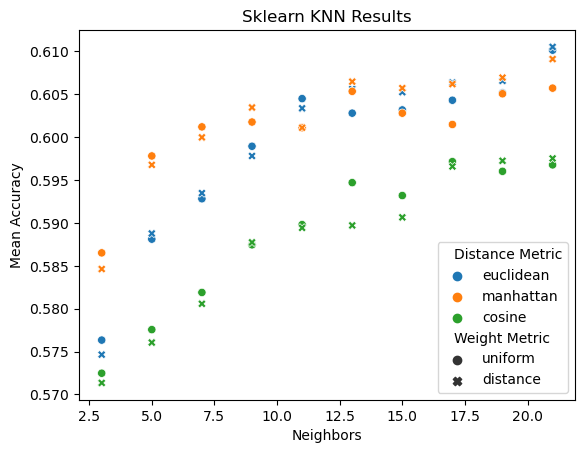

In [5]:
sns.scatterplot(data=sklearn, x='param_n_neighbors', y='mean_test_score', hue='Distance Metric', style='Weight Metric')
plt.ylabel('Mean Accuracy')
plt.xlabel('Neighbors')
plt.title('Sklearn KNN Results')
plt.show()

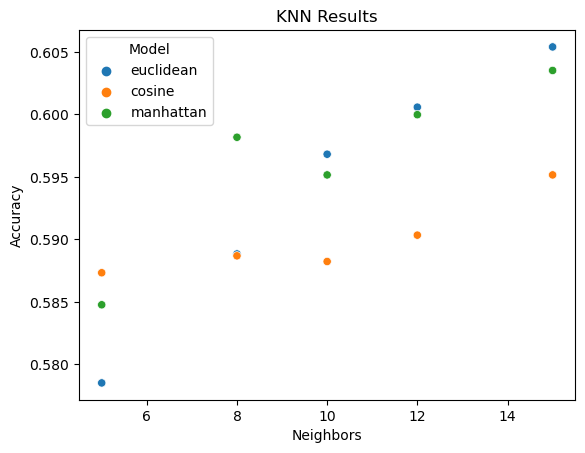

In [6]:
sns.scatterplot(data=knn, x='K', y='Accuracy', hue='Model')
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.title('KNN Results')
plt.show()